# Insurance Pricing Optimization

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Runtime-requirement" data-toc-modified-id="Runtime-requirement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Runtime requirement</a></span></li><li><span><a href="#Loading-the-input-data" data-toc-modified-id="Loading-the-input-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading the input data</a></span></li><li><span><a href="#Visual-insight" data-toc-modified-id="Visual-insight-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visual insight</a></span><ul class="toc-item"><li><span><a href="#Price-sensitivity" data-toc-modified-id="Price-sensitivity-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Price sensitivity</a></span></li><li><span><a href="#Expected-revenue" data-toc-modified-id="Expected-revenue-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Expected revenue</a></span></li></ul></li><li><span><a href="#Deriving-KPIs--(no-optimization)" data-toc-modified-id="Deriving-KPIs--(no-optimization)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Deriving KPIs  (no optimization)</a></span><ul class="toc-item"><li><span><a href="#Retention-and-revenue-if-applying-previous-price" data-toc-modified-id="Retention-and-revenue-if-applying-previous-price-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Retention and revenue if applying previous price</a></span></li><li><span><a href="#Retention-for-max-revenue" data-toc-modified-id="Retention-for-max-revenue-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Retention for max revenue</a></span></li><li><span><a href="#Revenue-for-max-retention" data-toc-modified-id="Revenue-for-max-retention-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Revenue for max retention</a></span></li><li><span><a href="#Retention-revenue-KPIs-chart" data-toc-modified-id="Retention-revenue-KPIs-chart-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Retention-revenue KPIs chart</a></span></li></ul></li><li><span><a href="#Dealing-with-several-business-objectives-and-constraints" data-toc-modified-id="Dealing-with-several-business-objectives-and-constraints-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dealing with several business objectives and constraints</a></span><ul class="toc-item"><li><span><a href="#Creating-Optimization-Model-(CPLEX)" data-toc-modified-id="Creating-Optimization-Model-(CPLEX)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating Optimization Model (CPLEX)</a></span></li><li><span><a href="#Solving-optimization-model" data-toc-modified-id="Solving-optimization-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Solving optimization model</a></span></li><li><span><a href="#Relaxing-constraints-if-no-solution" data-toc-modified-id="Relaxing-constraints-if-no-solution-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Relaxing constraints if no solution</a></span></li><li><span><a href="#Analyzing-solution" data-toc-modified-id="Analyzing-solution-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Analyzing solution</a></span></li></ul></li><li><span><a href="#Analyzing-optimal--combination-revenue/retention--(Pareto-optimality)" data-toc-modified-id="Analyzing-optimal--combination-revenue/retention--(Pareto-optimality)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyzing optimal  combination revenue/retention  (Pareto optimality)</a></span><ul class="toc-item"><li><span><a href="#Configuring-and-running-lexicographic-optimization" data-toc-modified-id="Configuring-and-running-lexicographic-optimization-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Configuring and running lexicographic optimization</a></span></li><li><span><a href="#Visualizing-Pareto-frontier" data-toc-modified-id="Visualizing-Pareto-frontier-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Visualizing Pareto frontier</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Overview

The goal of this notebook is to optimize the price offered to a set of customers for renewing their insurance contract e.g for cars, home, health. Optimization criteria include maximizing revenue, maximizing retention of customers or minimizing average price increase. Business constraints include keeping new prices in some ranges, insuring minimum revenue or insuring minimum retention.<br>


The following input tables are provided as data assets in the project :
<dl>
  <dt>PriceBounds</dt>
  <dd>- For each customer, this table gives the previous price of the insurance contract as well as a lower bound and an upper bound for the new price. The lower bound is mainly determined by the internal cost to cover the specific risks while the upper bound is mainly determined by competition analysis and customer profile.</dd>
  <dt>PriceSensitivity</dt>
  <dd>- For each customer, this table defines the probabilities that a customer will accept different prices between the lower bound and upper bound. This data is typically the result of a Machine Learning experiment which could have been conducted in this project. As this demo just focuses on optimization it is taken as input.</dd>
  <dt>ChangeLimits</dt>
  <dd>- Defines minimum limits for revenue and customer retention, and maximum limits for average price increases.</dd>
    <dt>ObjectiveWeights</dt>
  <dd>- Defines weights associated to each optimization objective namely revenue, customer retention, average price increase.</dd>
</dl>
 
After the data is loaded, some KPIs are derived manually to provide visual insight to better understand the solution limits without any business constraints. In particular, what would be the revenue and retention rate if the previous price is just applied, or if the focus is on maximizing the revenue, or maximizing retention.

Then an optimization model is created based on  **[IBM® Decision Optimization CPLEX® Modeling for Python](https://cdn.rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html)** to combine different objectives with specific weights and to take into account the business constraints. As some hard limits expressed in input data lead to an infeasible model, constraint relaxation is introduced to obtain a solution.

Lastly, the optimal frontier (Pareto optimality) between revenue and customer retention is analyzed which provides a set of optimal combinations between these 2 objectives.

For documentation about Python Notebook for Decision Optimization, see  **[Decision Optimization notebooks](https://dataplatform.cloud.ibm.com/docs/content/DO/DODS_Introduction/DONotebooks.html?audience=wdp&context=wdp>)**.

## Runtime requirement

To run this Notebook you must use an environment that has the full version of CPLEX (<i>DO + NLP Runtime xx.x on Python 3.x</i>).

## Loading the input data

In [2]:
import pandas as pd

#### Insert a project token

When you import this project from the IBM Cloud Pak for Data/watsonx Gallery, a token should be automatically generated and inserted at the top of this notebook as a code cell such as the one below:

```python
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='YOUR_PROJECT_ID', project_access_token='YOUR_PROJECT_TOKEN')
pc = project.project_context
```

If you do not see the cell above, follow these steps to enable the notebook to access the data set from the project's resources:

* Click `More -> Insert project token` in the top-right menu section
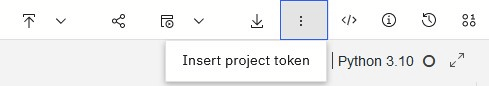

* This inserts a cell at the top of this notebook similar to the example given above.

  > If an error is displayed indicating that no project token is defined, follow [these instructions](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/token.html?audience=wdp&context=data).

* Run the newly inserted cell before proceeding with the notebook execution below.

In [3]:
#dd-ignore
# @hidden_cell
# from project_lib import Project
# project = Project(project_id='your-project-id', project_access_token='your-access-token')

In [4]:
#dd-ignore
inputs = {}

inputs['PriceBounds'] = pd.read_csv(project.get_file('PriceBounds.csv'))
inputs['PriceBounds'].head()

customer  lowerBound  upperBound  previousPrice
0       0.0      356.10      674.46         406.22
1       1.0      454.98      633.96         502.99
2       2.0      452.95      660.60         514.89
3       3.0      603.37      809.16         643.29
4       4.0      810.37     1490.99         918.38

In [5]:
#dd-ignore
inputs['PriceSensitivity'] = pd.read_csv(project.get_file('PriceSensitivity.csv'))
inputs['PriceSensitivity'].head()

customer  priceIndex   price  probability  revenue
0         0           0  356.10       0.9778   348.18
1         0           1  364.06       0.9635   350.78
2         0           2  372.02       0.9814   365.11
3         0           3  379.98       0.9694   368.33
4         0           4  387.93       0.9835   381.54

In [6]:
#dd-ignore
inputs['ObjectiveWeights'] = pd.read_csv(project.get_file('ObjectiveWeights.csv'))
inputs['ObjectiveWeights'].head()

name  value
0         retention      0
1  avgPriceIncrease      0
2           revenue      1

In [7]:
#dd-ignore
inputs['ChangeLimits'] = pd.read_csv(project.get_file('ChangeLimits.csv'))
inputs['ChangeLimits'].head()

name  value
0       minRetentionRatio   0.96
1         minRevenueRatio   0.90
2  maxAvgPriceIncreasePct   5.00

In [8]:
# Extracting core data

priceBounds = inputs['PriceBounds'].set_index(['customer'])
priceSensitivity = inputs['PriceSensitivity'].set_index(['customer', 'priceIndex'])
customers = inputs['PriceSensitivity']['customer'].unique().tolist()
priceIndices = inputs['PriceSensitivity']['priceIndex'].unique().tolist()
objectiveWeights = inputs['ObjectiveWeights'].set_index(['name'])
changeLimits = inputs['ChangeLimits'].set_index(['name'],)        

minRetentionRatio = changeLimits.value["minRetentionRatio"];
minRevenueRatio = changeLimits.value["minRevenueRatio"];
maxAvgPriceIncrease = changeLimits.value["maxAvgPriceIncreasePct"];

revenueWeight = objectiveWeights.value["revenue"];
retentionWeight = objectiveWeights.value["retention"];
avgPriceIncreaseWeight = objectiveWeights.value["avgPriceIncrease"];

priceIndiceSubset =  priceIndices[:-1]
price = priceSensitivity.price
proba = priceSensitivity.probability
rev = priceSensitivity.revenue
previousPrice = priceBounds.previousPrice


## Visual insight

In [9]:
#dd-ignore
import matplotlib.pyplot as plt
import random
import numpy as np

### Price sensitivity

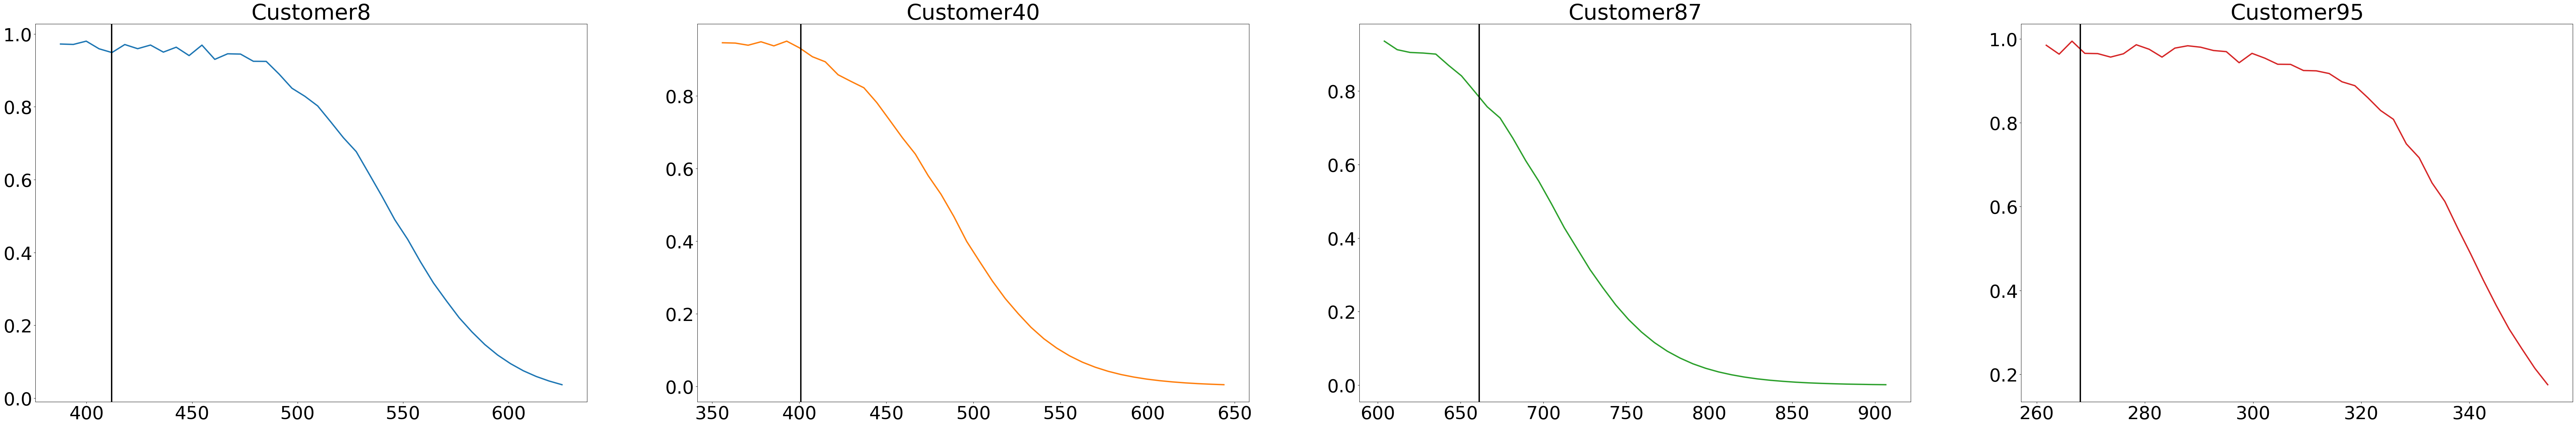

In [10]:
#dd-ignore
font = {'size'   : 40}
plt.rc('font', **font)


# Select randomly some customers
graphNb=4
selectedCust = np.sort(random.sample(customers, graphNb))

# Sensitivity analysis for selected customers
fig, axs = plt.subplots(1, graphNb, figsize=(100,15))
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for i in range(0,graphNb):
    c= selectedCust[i]
    c_prices = np.array(price[c])
    c_probas = np.array(proba[c])
    axs[i].plot(c_prices , c_probas, color[i%len(color)],linewidth=3.0)
    axs[i].set_title('Customer' + str(c))
    axs[i].axvline(previousPrice[c],color='black',linewidth=3.0)



### Expected revenue

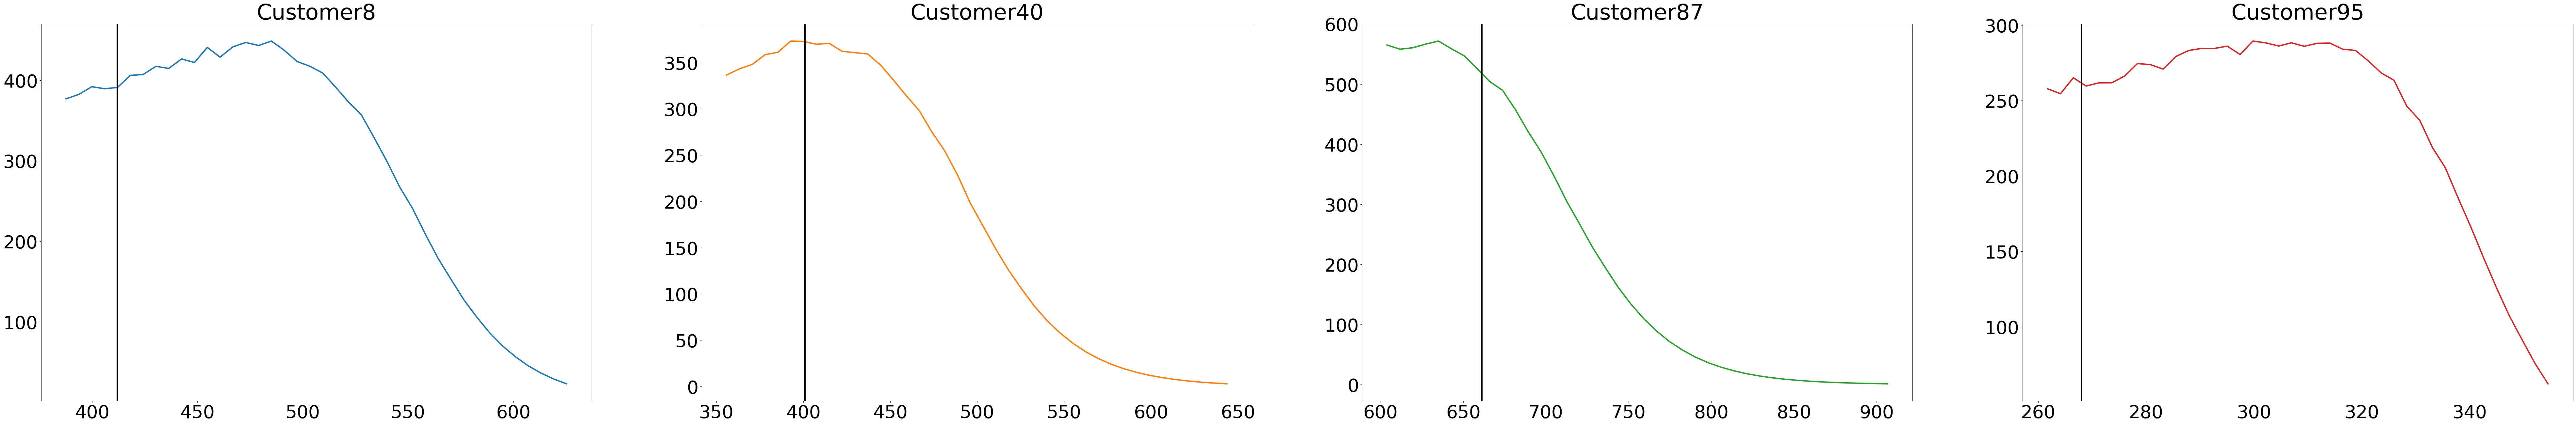

In [11]:
#dd-ignore

#Revenue analysis
fig, axs = plt.subplots(1, graphNb, figsize=(100,15))
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for i in range(0,graphNb):
    c= selectedCust[i]
    c_prices = np.array(price[c])
    c_revenues = np.array(rev[c])
    axs[i].plot(c_prices , c_revenues, color[i%len(color)],linewidth=3.0)
    axs[i].set_title('Customer' + str(c))
    axs[i].axvline(previousPrice[c],color='black',linewidth=3.0)


## Deriving KPIs  (no optimization)

### Retention and revenue if applying previous price

In [12]:
import math

lambdaPrev = {}
probaPrevLower = {}
probaPrevUpper = {}
pricePrevLower = {}
pricePrevUpper ={}

# Looking at previous price lower and upper sensitivity
for c in customers:
    for pi in priceIndiceSubset:
        sensitivity = priceSensitivity.loc[(c,pi)]
        nextSensitivity = priceSensitivity.loc[(c,pi+1)]
        if (sensitivity.price <= previousPrice[c]) and (previousPrice[c] < nextSensitivity.price):
            probaPrevLower[c] = sensitivity.probability
            probaPrevUpper[c] = nextSensitivity.probability
            pricePrevLower[c] = sensitivity.price
            pricePrevUpper[c] = nextSensitivity.price
            lambdaPrev[c] = (previousPrice[c] - sensitivity.price) / (nextSensitivity.price-sensitivity.price)
            
revenueIfPrevPrice = {}
retentionProbaIfPrevPrice= {}

# Linear aproximation of retention proba and revenue when applying previous price
for c in customers:
    revenueIfPrevPrice[c] = lambdaPrev[c] * pricePrevLower[c] * probaPrevLower[c] + (1-lambdaPrev[c])*pricePrevUpper[c] * probaPrevUpper[c]
    retentionProbaIfPrevPrice[c] = lambdaPrev[c] * probaPrevLower[c] + (1-lambdaPrev[c])*probaPrevUpper[c]
 
# Revenue and retention ratios for previous price
previousRevenue = sum(previousPrice[c] for c in customers)
revenueRatioIfPrevPrice = sum(revenueIfPrevPrice[c] for c in customers) / previousRevenue
retentionRatioIfPrevPrice = sum(retentionProbaIfPrevPrice[c] for c in customers) / len(customers)

### Retention for max revenue

In [13]:
maxRevenue = {}
retentionForMaxRevenue = {}

for c in customers:
    for pi in priceIndiceSubset:
      sensitivity = priceSensitivity.loc[(c,pi)]
      if c not in maxRevenue or sensitivity.price * sensitivity.probability >  maxRevenue[c]:
            maxRevenue[c] = sensitivity.price * sensitivity.probability
            retentionForMaxRevenue[c] = sensitivity.probability

# KPIs if focusing on max revenue
maxRevenueRatio = sum(maxRevenue[c] for c in customers) / previousRevenue
retentionRatioForMaxRevenue = sum(retentionForMaxRevenue[c] for c in customers) / len(customers)# KPIs if selecting max revenue

### Revenue for max retention

In [14]:
maxRetention = {}
revenueForMaxRetention = {}

for c in customers:
    for pi in priceIndiceSubset:
        sensitivity = priceSensitivity.loc[(c,pi)]
        if c not in maxRetention or sensitivity.probability >  maxRetention[c]:
            maxRetention[c] = sensitivity.probability
            revenueForMaxRetention[c] = sensitivity.price * sensitivity.probability

# KPIs if focusing on max retention
revenueRatioForMaxRetention = sum(revenueForMaxRetention[c] for c in customers) / previousRevenue
maxRetentionRatio = sum(maxRetention[c] for c in customers) / len(customers)

### Retention-revenue KPIs chart

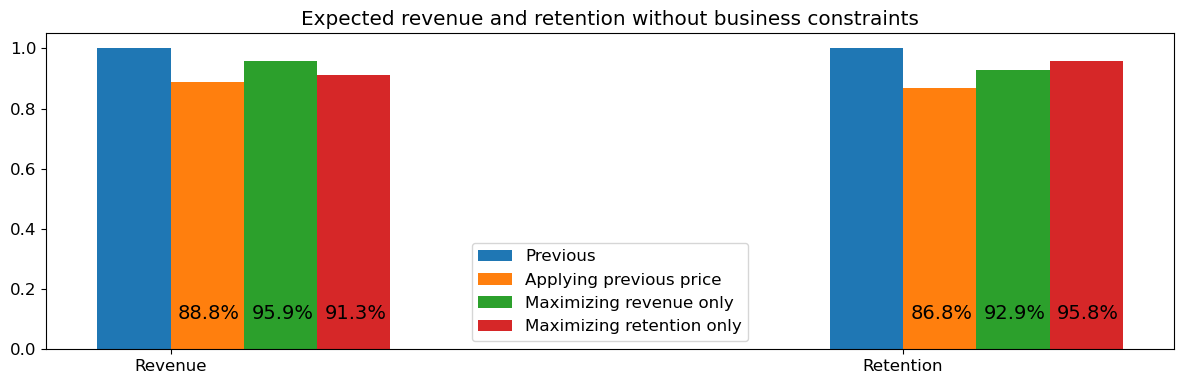

In [15]:

font = {'size'   : 12}
plt.rc('font', **font)

# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (1, 1)
# Specify the values of orange bars (height)
orange_bar = (revenueRatioIfPrevPrice, retentionRatioIfPrevPrice)
# Specify the values of orange bars (height)
green_bar = (maxRevenueRatio, retentionRatioForMaxRevenue)
# Specify the values of orange bars (height)
red_bar = (revenueRatioForMaxRetention, maxRetentionRatio)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,4))

# Width of a bar 
width = 0.1       

# Plotting
plt.bar(ind, blue_bar , width, label='Previous')
plt.bar(ind + width, orange_bar, width, label='Applying previous price')
plt.bar(ind + 2* width, green_bar, width, label='Maximizing revenue only')
plt.bar(ind + 3* width, red_bar, width, label='Maximizing retention only')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Revenue', 'Retention'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
for index,data in enumerate(orange_bar):
    plt.text(x=index+0.06 , y =0.1 , s=f"{round(data*100,1)}"+'%' , fontdict=dict(fontsize=14))
for index,data in enumerate(green_bar):
    plt.text(x=index+0.16 , y =0.1 , s=f"{round(data*100,1)}"+'%' , fontdict=dict(fontsize=14))
for index,data in enumerate(red_bar):
    plt.text(x=index+0.26 , y =0.1 , s=f"{round(data*100,1)}"+'%' , fontdict=dict(fontsize=14))
plt.title("Expected revenue and retention without business constraints")
plt.tight_layout()
plt.show()


## Dealing with several business objectives and constraints

### Creating Optimization Model (CPLEX)

In [16]:
from docplex.mp.model import Model

mdl = Model(name='InsurancePricing')

In [17]:
# Create variables

# Continuous variables for linear approximation of revenue and retention for each customers and price index
lambda1 = mdl.continuous_var_matrix(customers, priceIndices, lb=0, ub=1, name='lambda1')
lambda2 = mdl.continuous_var_matrix(customers, priceIndices, lb=0, ub=1, name='lambda2')
# Binary variable to decide for each customer which price index is selected 
z = mdl.binary_var_matrix(customers, priceIndiceSubset, name='z')


In [18]:
# Create KPIs and objectives

# Revenue ratio KPI
revenueRatio = mdl.sum(lambda1[c, pi]*rev[c, pi] + lambda2[c, pi]*rev[c, pi+1] for c in customers for pi in priceIndiceSubset)/previousRevenue
mdl.add_kpi(revenueRatio, publish_name="KPI.Revenue");
 
# Retention and price expressions for each customer
custRetention = {}
newPrice = {}
for c in customers:
    custRetention[c] = mdl.sum(lambda1[c, pi]*proba[c, pi] + lambda2[c, pi]*proba[c, pi+1] for pi in priceIndiceSubset)
    newPrice[c] = mdl.sum(lambda1[c, pi]*price[c, pi] + lambda2[c, pi]*price[c, pi+1] for pi in priceIndiceSubset)

# Retention ratio KPI
retentionRatio = mdl.sum(custRetention[c] for c in customers)/len(customers)
mdl.add_kpi(retentionRatio, publish_name="KPI.Retention")

# Average price increase KPI
averagePriceIncrease = mdl.sum(((newPrice[c]-previousPrice[c])/previousPrice[c]) for c in customers)/len(customers) 
mdl.add_kpi(averagePriceIncrease, publish_name="KPI.AvgPriceIncrease")
 
# Maximizing combination of weighted KPis
resRevenue = revenueWeight * revenueRatio;
resRetention = retentionWeight * retentionRatio ;
resAvgPriceIncrease = - avgPriceIncreaseWeight * averagePriceIncrease;
 
mdl.maximize(resRevenue + resRetention - resAvgPriceIncrease)

In [19]:
# Create constraints
# Constraint names includes priority e.g LOW, MEDIUM, HIGH to be used for relaxing constraints if no solution found

# Linear approximation of selected prices
for c in customers:
    for pi in priceIndiceSubset:
        mdl.add_constraint(lambda1[c, pi] + lambda2[c, pi] - z[c, pi] == 0, 'ctLinearizedPrice_MANDATORY')

for c in customers:
    # Only one price selected per customer
    mdl.add_constraint( mdl.sum(z[c, pi] for pi in priceIndiceSubset) == 1, 'ctSinglePrice_MANDATORY')  
    # Respect price lower and upper bounds defined in input data
    mdl.add_constraint( newPrice[c] >= priceBounds.lowerBound[c], 'ctLowerPrice_HIGH')
    mdl.add_constraint( newPrice[c] <= priceBounds.upperBound[c], 'ctUpperPrice_HIGH')

# Respect min retention ratio defined in input data
mdl.add_constraint(retentionRatio >= minRetentionRatio, 'ctMinRetention_MEDIUM' )
# Respect min revenue ratio defined in input data
mdl.add_constraint(revenueRatio >= minRevenueRatio, 'ctMinRevenue_MEDIUM')
# Respect max average price increase defined in input data
mdl.add_constraint(averagePriceIncrease <= maxAvgPriceIncrease, 'ctMaxAveragePriceIncrease_LOW')

mdl.print_information()        

Model: InsurancePricing
 - number of variables: 11900
   - binary=3900, integer=0, continuous=8000
 - number of constraints: 4203
   - linear=4203
 - parameters: defaults
 - objective: maximize
 - problem type is: MILP


### Solving optimization model

In [20]:
solution = mdl.solve()

### Relaxing constraints if no solution

In [21]:
from docplex.mp.relaxer import Relaxer
from docplex.mp.constants import RelaxationMode

if (solution is None):
    print("No solution found")
    print(mdl.solve_details)
    print("Re-solve allowing relaxation of some constraints")
    # Relaxation in 'match'  mode : relaxation priorities are derived from constraint names
    relaxer = Relaxer(prioritizer='match')
    solution = relaxer.relax(mdl, relax_mode=RelaxationMode.OptSum)
    if (solution):
        print("Relaxed solution found")
        for ct,relax in relaxer.iter_relaxations():
            print(ct.name + " relaxed. Numeric relaxation:" + str(relax))
    else:
        print("Cannot find relaxed solution with only named constraints as relaxable (hint: extend the set of relaxable constraints)")

No solution found
status  = integer infeasible
time    = 0.240822 s.
problem = MILP

Re-solve allowing relaxation of some constraints
Relaxed solution found
ctMinRetention_MEDIUM relaxed. Numeric relaxation:-0.0023850000000004146


### Analyzing solution

In [22]:
if solution:
    outputs = {}

    result = None

    result = [ [c,custRetention[c].solution_value,newPrice[c].solution_value,previousPrice[c], round((newPrice[c].solution_value - previousPrice[c])/previousPrice[c],3)*100] for c in customers ]

    outputs['objective'] = pd.DataFrame(data=[[round(revenueRatio.solution_value,3),round(retentionRatio.solution_value,3),round(averagePriceIncrease.solution_value,2)]], columns=['RevenueRatio','RetentionRatio','AvgPriceIncrease'])

    outputs['result'] = pd.DataFrame(data=result, columns=['Customer', 'Retention proba', 'Optimized price', 'Previous price', 'Variation(%)'])

In [23]:

    print ("Optimized prices KPIs:")
    display(outputs['objective'])

    print("Optimized Prices :")
    display(outputs['result'])


Optimized prices KPIs:


RevenueRatio  RetentionRatio  AvgPriceIncrease
0         0.913           0.958             -0.05

Optimized Prices :


Customer  Retention proba  Optimized price  Previous price  Variation(%)
0          0           0.9835           387.93          406.22          -4.5
1          1           0.9802           468.40          502.99          -6.9
2          2           0.9931           458.15          514.89         -11.0
3          3           0.9880           608.51          643.29          -5.4
4          4           0.9559           810.37          918.38         -11.8
..       ...              ...              ...             ...           ...
95        95           0.9945           266.52          268.04          -0.6
96        96           0.9014            71.31           76.96          -7.3
97        97           0.8376            78.70           83.40          -5.6
98        98           0.9378           495.46          511.81          -3.2
99        99           0.9763           572.47          648.17         -11.7

[100 rows x 5 columns]

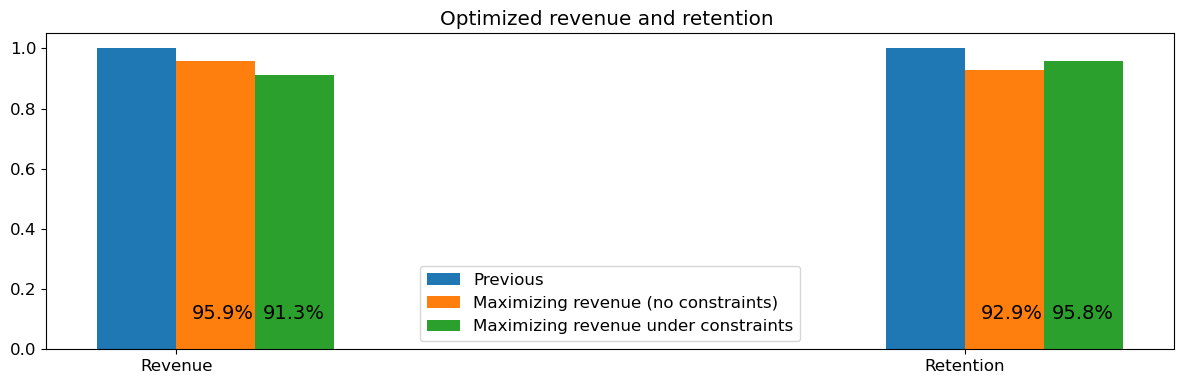

In [24]:

if solution:
    font = {'size'   : 12}
    plt.rc('font', **font)

    # Numbers of pairs of bars you want
    N = 2

    blue_bar = (1, 1)
    orange_bar = (maxRevenueRatio, retentionRatioForMaxRevenue)
    green_bar = (revenueRatio.solution_value, retentionRatio.solution_value)

    
    # Position of bars on x-axis
    ind = np.arange(N)

    # Figure size
    plt.figure(figsize=(12,4))

    # Width of a bar 
    width = 0.1       

    # Plotting
    plt.bar(ind, blue_bar , width, label='Previous')
    plt.bar(ind + width, orange_bar, width, label='Maximizing revenue (no constraints)')
    plt.bar(ind + 2* width, green_bar, width, label='Maximizing revenue under constraints')

    plt.xticks(ind + width / 2, ('Revenue', 'Retention'))

    # Finding the best position for legends and putting it
    plt.legend(loc='best')
    for index,data in enumerate(orange_bar):
        plt.text(x=index+0.07 , y =0.1 , s=f"{round(data*100,1)}"+'%' , fontdict=dict(fontsize=14))
    for index,data in enumerate(green_bar):
        plt.text(x=index+0.16 , y =0.1 , s=f"{round(data*100,1)}"+'%' , fontdict=dict(fontsize=14))
    plt.title("Optimized revenue and retention ")
    plt.tight_layout()
    plt.show()


## Analyzing optimal  combination revenue/retention  (Pareto optimality)

The aim is to find the set of best combinations of the revenue/retention objectives.<br>

For that purpose lexicographic (hierarchical) optimization provided by CPLEX is used. After removing constraints with respect to the change limits, a sequence of lexicographic optimization is configured. Each solve optimizes first the revenue, and then optimizes the retention, giving some tolerance to the optimal revenue obtained in first phase. The solve is repeated with different values of tolerance so that the revenue ranges between revenueForMaxRetention and maxRevenue, as computed in section  <a href="#Deriving-KPIs--(no-optimization)">Deriving KPIs (no optimization)</a>

The objective values obtained for each solve define an optimal couple revenue/retention. The set of couples resulting from the iterative solve can be represented as points on a graph. The curve joining these points is known as the  <a href="https://www.sciencedirect.com/topics/engineering/pareto-frontier"> Pareto frontier</a>.


### Configuring and running lexicographic optimization

In [25]:
from docplex.mp.constants import ObjectiveSense
paretoOptimality = {}

# Get rid of constraints on change limits
for ctt in ['ctMinRetention_MEDIUM', 'ctMinRevenue_MEDIUM', 'ctMaxAveragePriceIncrease_LOW']:
    mdl.remove_constraint(ctt)

# Define max tolerance on revenue and increment for each solve
maxRevenueAbsTolerance = maxRevenueRatio - revenueRatioForMaxRetention
incrNb=15
incrRevenueTol = maxRevenueAbsTolerance / incrNb

# Iterative lexicographic optimization with increasing tolerance on revenue
for i in range(0, incrNb):
    revTol=incrRevenueTol*i
    print("Solving with absolute tolerance of " + str(round(revTol,4)) +"...")
    mdl.maximize_static_lex([revenueRatio,retentionRatio], abstols=[revTol, 0])
    mdl.solve()
    mdl.report()
    
    paretoOptimality[round(revenueRatio.solution_value,5)]=round(retentionRatio.solution_value,5)

Solving with absolute tolerance of 0.0...
* model InsurancePricing solved with objectives = [0.959, 0.929]
*  KPI: KPI.Revenue          = 0.959
*  KPI: KPI.Retention        = 0.929
*  KPI: KPI.AvgPriceIncrease = 0.025
Solving with absolute tolerance of 0.0031...
* model InsurancePricing solved with objectives = [0.956, 0.945]
*  KPI: KPI.Revenue          = 0.956
*  KPI: KPI.Retention        = 0.945
*  KPI: KPI.AvgPriceIncrease = -0.001
Solving with absolute tolerance of 0.0062...
* model InsurancePricing solved with objectives = [0.953, 0.948]
*  KPI: KPI.Revenue          = 0.953
*  KPI: KPI.Retention        = 0.948
*  KPI: KPI.AvgPriceIncrease = -0.010
Solving with absolute tolerance of 0.0093...
* model InsurancePricing solved with objectives = [0.950, 0.950]
*  KPI: KPI.Revenue          = 0.950
*  KPI: KPI.Retention        = 0.950
*  KPI: KPI.AvgPriceIncrease = -0.015
Solving with absolute tolerance of 0.0124...
* model InsurancePricing solved with objectives = [0.947, 0.952]
*  KPI

### Visualizing Pareto frontier

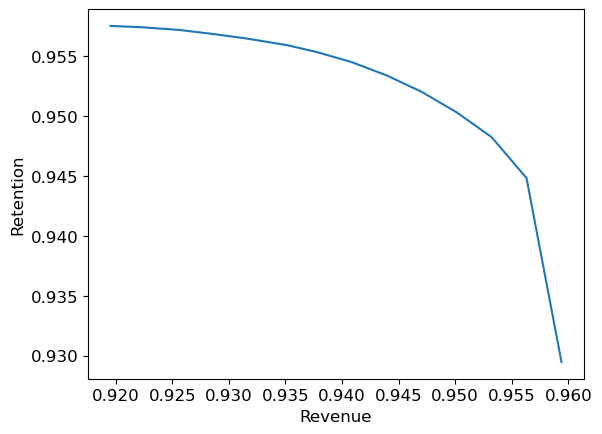

In [26]:
plt.xlabel('Revenue')
plt.ylabel('Retention')
plt.plot(list(paretoOptimality.keys()), list(paretoOptimality.values()))

## Conclusion

In this demo you have seen how to use Decision Optimization in IBM Cloud Pak for Data to find solutions to a price optimization problem under business constraints and with competing business objectives. <br>

Here are some suggestions to go further with this demonstration:
 <ul>
  <li>Test additional business constraints such as limiting the average price decrease and compare with a baseline solution using scenarios in the <a href="https://dataplatform.cloud.ibm.com/docs/content/DO/DODS_Introduction/buildingmodels.html?audience=wdp" target="_blank" rel="noopener noreferrer">experiment</a>.
  <li>Extend this project with a <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-overview.html?audience=wdp" target="_blank" rel="noopener noreferrer">machine learning</a> experiment to generate the price sensitivity data used in this demo from some historical data.</li>
</ul> 

Copyright © 2020-2024 IBM. This notebook and its source code are released under the terms of the MIT License.